<a href="https://colab.research.google.com/github/JOSPHATT/REALTIMEFOREX.py/blob/main/REALTIME_FOREX_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
github_url='https://raw.githubusercontent.com/JOSPHATT/REALTIMEFOREX.py/main/realtimeforex.txt'
import requests
def data_gen(url):
    r = requests.get(url)
    data = r.text
    return data
Forex_data=data_gen(github_url)
last_char=len(Forex_data)
#print(Forex_data)
with open("myfile.txt", "w") as fp:
    fp.writelines(Forex_data)
import json
with open('myfile.txt') as f:
    content_list = [line.rstrip() for line in f]
FOREX_DATA={}
forex_data=[j.replace("'",'"') for j in content_list]
#print(forex_data)
C=0
for data in forex_data:  
    g=json.loads(data)
    FOREX_DATA[C]=g
    C=C+1
pairs=[['AUD','JPY'],['AUD','NZD'],['AUD','USD'],['CAD','JPY'],['EUR','JPY'],['EUR','USD'],['GBP','JPY'],['USD','JPY']]
n_pairs=[pair[0]+pair[1] for pair in pairs]
#print(n_pairs)
Forex_dataframe={}
for v in FOREX_DATA.values():
    for p in n_pairs:
        if p not in Forex_dataframe.keys():
            Forex_dataframe[p]=[v[p]]
        else:
            Forex_dataframe[p].append(v[p])

#load data into a DataFrame object:
import pandas as pd
df = pd.DataFrame(Forex_dataframe)

#currency pairs as rows
DataFrame=df.T
DataFrame.dtypes
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, AUDJPY to USDJPY
Columns: 229 entries, 0 to 228
dtypes: float64(229)
memory usage: 14.4+ KB


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Plot_styles=plt.style.available
Plot_styles[7]

'fast'

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

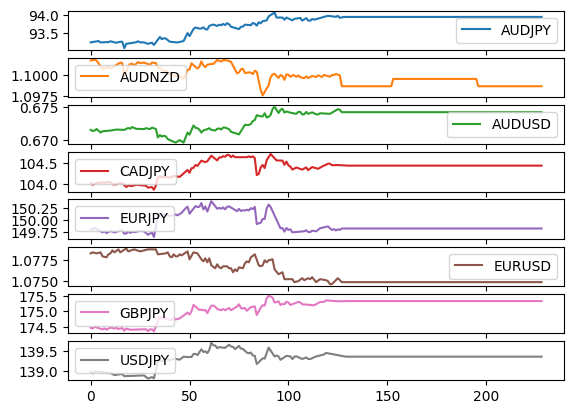

In [4]:
import time
#for style in Plot_styles:    
plt.style.use(Plot_styles[7])

df.plot(kind='line', subplots=True)

In [ ]:
pip install pandasgui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.4/230.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.9/983.9 kB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.

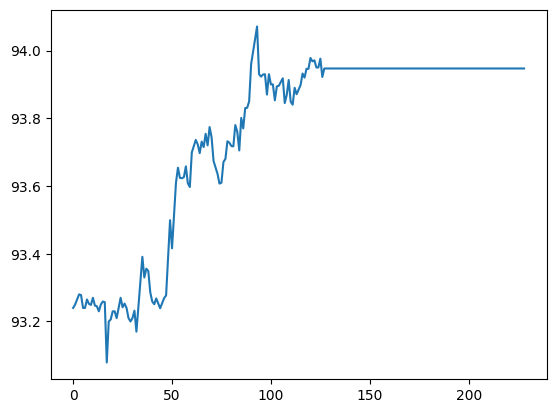

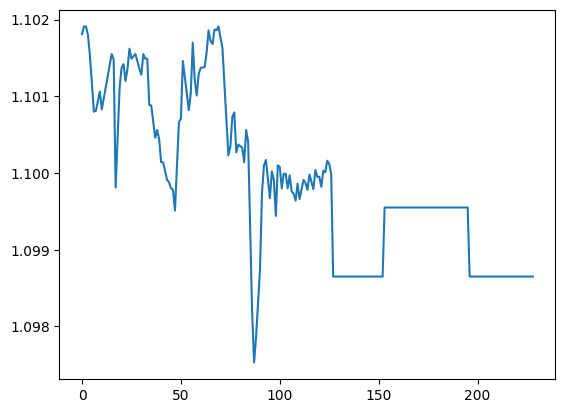

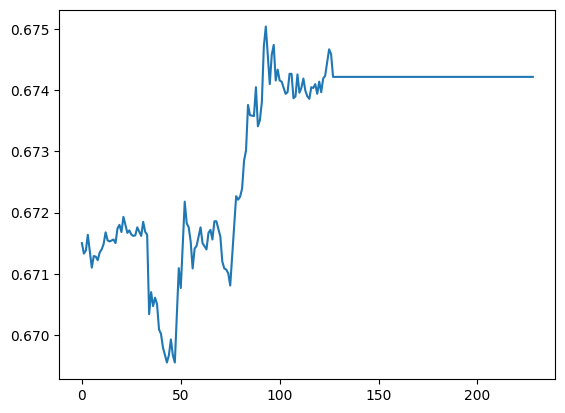

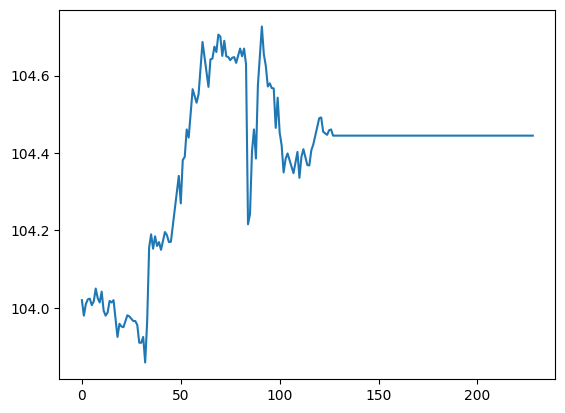

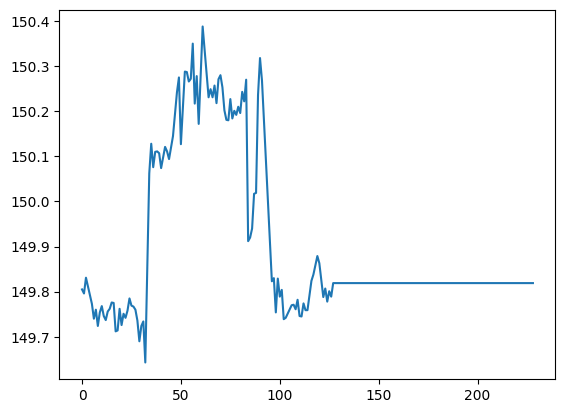

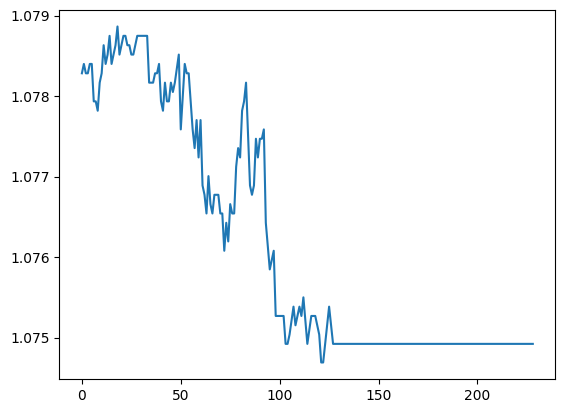

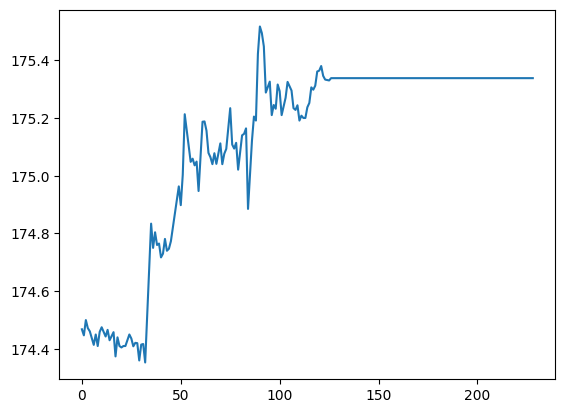

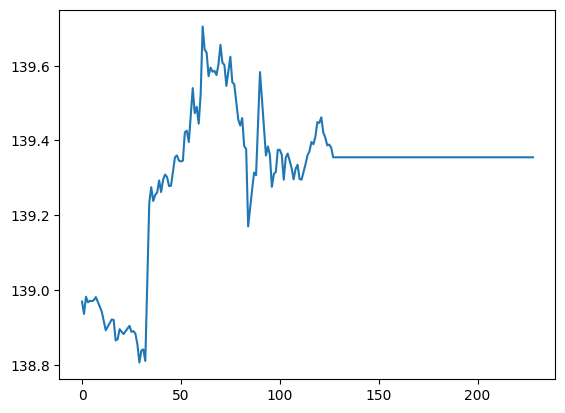

In [14]:
#githuburl
from pylab import *
for i in df.columns:

    plot(df[i])
    show()

In [ ]:
df.columns[0]

'AUDJPY'

In [ ]:
df['currency_pairs']

KeyError: ignored

In [ ]:
DataFrame.index

Index(['AUDJPY', 'AUDNZD', 'AUDUSD', 'CADJPY', 'EURJPY', 'EURUSD', 'GBPJPY',
       'USDJPY'],
      dtype='object')

In [ ]:

import time
Time_Stamp=time.asctime()
File_name='Realtime'+Time_Stamp+'.csv'
DataFrame.to_csv(path_or_buf=File_name, sep=',', na_rep='', float_format=None, columns=[col for col in range(0,len(df))], header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', lineterminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

In [ ]:
import time
help (time)

Help on built-in module time:

NAME
    time - This module provides various functions to manipulate time values.

DESCRIPTION
    There are two standard representations of time.  One is the number
    of seconds since the Epoch, in UTC (a.k.a. GMT).  It may be an integer
    or a floating point number (to represent fractions of seconds).
    The Epoch is system-defined; on Unix, it is generally January 1st, 1970.
    The actual value can be retrieved by calling gmtime(0).
    
    The other representation is a tuple of 9 integers giving local time.
    The tuple items are:
      year (including century, e.g. 1998)
      month (1-12)
      day (1-31)
      hours (0-23)
      minutes (0-59)
      seconds (0-59)
      weekday (0-6, Monday is 0)
      Julian day (day in the year, 1-366)
      DST (Daylight Savings Time) flag (-1, 0 or 1)
    If the DST flag is 0, the time is given in the regular time zone;
    if it is 1, the time is given in the DST time zone;
    if it is -1, mktime() sh

In [ ]:
time.asctime()

'Sat Jun 10 18:53:09 2023'

In [ ]:

# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

SyntaxError: ignored

In [ ]:
import seaborn as sns

In [ ]:
[G for G in df.loc[0]]

[93.24, 1.10181, 0.67150146, 104.02, 149.805, 1.0782834, 174.468, 138.969]

In [ ]:

print(len(df),len(df.columns))
data={}
C=0
Data={"currency_pair": [G for G in df.columns]*len(df)}

Times=[]
for i in range(0,len(df)):
    Times.append([str(i)]*8)
Timestamp=sum(Times, [])
print(Timestamp)
Data["Timestamps"]=Timestamp
Prices=[]

for i in range(0,len(df)):    
    Prices.append([G for G in df.loc[i]])
n_Prices=sum(Prices, [])
Data["Price"]=n_Prices
print(len(Data["currency_pair"]),len(Data["Timestamps"]))
seaborn_df = pd.DataFrame(Data)
print(seaborn_df)

132 8
['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '10', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13', '13', '13', '13', '14', '14', '14', '14', '14', '14', '14', '14', '15', '15', '15', '15', '15', '15', '15', '15', '16', '16', '16', '16', '16', '16', '16', '16', '17', '17', '17', '17', '17', '17', '17', '17', '18', '18', '18', '18', '18', '18', '18', '18', '19', '19', '19', '19', '19', '19', '19', '19', '20', '20', '20', '20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '21', '21', '21', '22', '22', '22',

In [ ]:
Rseaborn_dataset=seaborn_df.to_xarray()
seaborn_dataset.to_array()["Price"]

NameError: ignored

In [ ]:
flights_wide =seaborn_df.pivot(index='Timestamps', values='currency_pair', columns='Price')
flights_wide.head()

Price,0.669550,0.669667,0.669671,0.669689,0.669792,0.669927,0.670017,0.670089,0.670340,0.670421,...,175.333000,175.338000,175.346000,175.361000,175.364000,175.380000,175.422000,175.448000,175.494000,175.517000
Timestamps,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


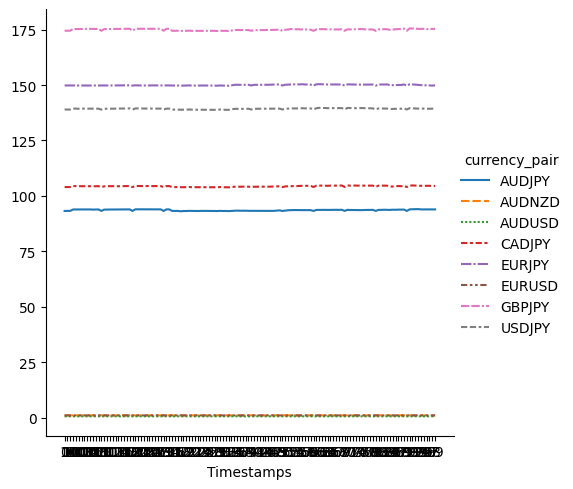

In [ ]:
sns.relplot(data=flights_wide, kind="line")

In [ ]:
dat=seaborn_dataset.to_array()
dat'Price'

SyntaxError: ignored

In [ ]:

flights = sns.load_dataset("flights")
flights[0:14]

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


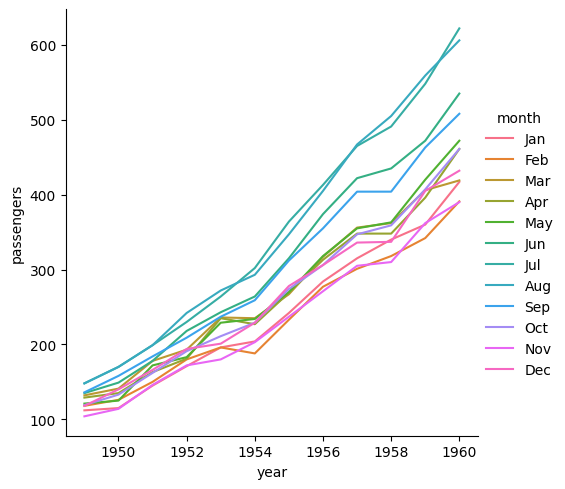

In [ ]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

In [ ]:
len(df)

125

In [ ]:
df

,Numbers
0,0
1,1
2,2
3,3
4,4
...,...
120,120
121,121
122,122
123,123


In [ ]:
import seaborn.objects as so
import time
(        
    so.Plot(df.T, y=pair, x=df.index)
    .add(so.Dot())
)


(
    so.Plot(df,x=df.index)    
    .facet(pair)
    .add(so.Bars(), so.Hist())
)

ValueError: ignored